### Força bruta

1) testar, para cada combinação de m colunas de A, se elas formam uma base; 

2) calcular, para cada base, a solução básica associada a ela; 

3) calcular, para todas as SBV obtidas, o valor da função objetivo.

Esse código identifica as soluções básicas, as soluções viáveis e o valor da função objetivo para problemas com 2 ou 3 restrições.

Contribua com esse código no github:
https://github.com/myllah/UFG-Sistemas-de-Informacao/tree/master/pesquisa-operacional-2020.2

In [1]:
from math import factorial
from __future__ import print_function
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
class forca_bruta: 
       
    def __init__(self, A, b, c, max_min):
        self.A = A
        self.b = b
        self.c = c
        self.max_min = max_min
        
        self.m = len(A)
        self.n = len(A[0])
        
    def print_atributes(self):
        print('A:', self.A, '\n')
        print('b:', self.b, '\n')
        print('c:', self.c, '\n')
        
        print("1: maximizar || 2: minimizar: ")
        print('max_min:', self.max_min, '\n')
        
    def get_A(self):
        return self.A
    
    def get_b(self):
        return self.b

    def get_c(self):
        return self.c
    
    def get_max_min(self):
        return self.max_min
    
    def get_todas_solucoes(self):
        return self.todas_solucoes
    
    def get_solucoes_viaveis(self):
        return self.solucoes_viaveis

    def get_solucao_otima(self):
        return self.solucao_otima
    
    def get_geram_solucoes_otimas(self):
        return self.geram_solucoes_otimas
    
    def get_qtd_solucoes_basicas(self):
        return self.qtd_solucoes_basicas
    
    def get_qtd_solucoes_viaveis(self):
        return self.qtd_solucoes_viaveis
    
    def get_combinacoes(self):
        return self.combinacoes
    
    def get_n(self):
        return self.n
    
    def get_m(self):
        return self.m
    
    def set_A(self, A):
        self.A = A
    
    def set_b(self, b):
        self.b = b
        
    def set_c(self, c):
        self.c = c
    
    def set_max_min(self, max_min):
        self.max_min = max_min
        
    def set_todas_solucoes(self, todas_solucoes):
        self.todas_solucoes = todas_solucoes
        
    def set_solucoes_viaveis(self, solucoes_viaveis):
        self.solucoes_viaveis = solucoes_viaveis
        
    def set_solucao_otima(self, solucao_otima):
        self.solucao_otima = solucao_otima
        
    def set_geram_solucoes_otimas(self, geram_solucoes_otimas):
        self.geram_solucoes_otimas = geram_solucoes_otimas
        
    def set_combinacoes(self, combinacoes):
        self.combinacoes = combinacoes
        
    def set_qtd_solucoes_basicas(self, qtd_solucoes_basicas):
        self.qtd_solucoes_basicas = qtd_solucoes_basicas
    
    def set_qtd_solucoes_viaveis(self, qtd_solucoes_viaveis):
        self.qtd_solucoes_viaveis = qtd_solucoes_viaveis
    
    def verifica_solucao_viavel(self, x):
        '''
            Função que verifica se a solução é viável

            >> ppl.verifica_solucao_viavel([0, 0, [125.], 0, [125.], [475.], 0])
                Esta é uma solução básica viável
                True
            >> ppl.verifica_solucao_viavel([0, 0, 0, [300.], [-950.], 0, [500.]])
                Esta NÃO é uma solução básica viável
                False
            >> ppl.verifica_solucao_viavel([1, 0, 1, 0, 1, 0, 0])
                Esta é uma solução básica viável
                True
            >> ppl.verifica_solucao_viavel([0,0,0,0,0])
                Esta é uma solução básica viável
                True
        '''

        xB_bool = []

        for w in range(0, len(x)):
            if(x[w] >= 0):
                xB_bool.append(True)           
            else:
                xB_bool.append(False)

            try:
                if(x[w][0] >= 0):
                    xB_bool.append(True)
                else:
                    xB_bool.append(False)
            except:
                pass

        if(all(xB_bool)):
            print('Esta é uma solução básica viável')
            return True
        else:
            print('Esta NÃO é uma solução básica viável')
            return False

    def solve(self):
        '''
            Função que testa cada possível base, encontra a solução básica associada e seu valor da função objetivo
        '''
        
        solucoes_viaveis = np.array([[0,0,0], 0,0,0], dtype=object)
        todas_solucoes = np.array([[0,0,0], 0,0,0], dtype=object)
        cont_x = 0

        n = self.get_n();
        m = self.get_m();
        
        ## Caso tenha duas restrições
        if(len(b) == 2):
            for w in range(0, n):
                for y in range(w+1, n):
                    
                        # Id da solução
                        cont_x = cont_x + 1;
                        print('\nx', cont_x)

                        # Conjunto de índices IB
                        IB = [w,y]
                        print('IB =', IB[0]+1, IB[1]+1)

                        # B
                        B = np.array([A[0][w], A[0][y]])
                        for v in range (1, m):
                            B = np.row_stack(tup=(B, [A[v][w], A[v][y]]))
                        print('B =', B, '\n')

                        # Verificando se B é uma base
                        v, V =  np.linalg.eig(B)

                        if(v.all() == 0):

                            print('A matriz B não é uma base')
                            #print('A linha LD é:')
                            #print (B[v == 0,:])
                            print('\n---------------------------------------------------------------------------\n')

                            # Colocar na tabela de soluções básicas, com informações vazias
                            todas_solucoes = np.row_stack((todas_solucoes, [[IB[0]+1, IB[1]+1], cont_x, [], []]))
                            continue

                        # B-1
                        try:
                            B1 = np.linalg.inv(B)
                            print('B-1 =', B1, '\n')
                        except:
                            print("B-1 não existe")
                            todas_solucoes = np.row_stack((todas_solucoes, [[IB[0]+1, IB[1]+1], cont_x, [], []]))
                            print('\n---------------------------------------------------------------------------\n')
                            continue

                        # xB
                        xB = B1.dot(b)
                        print('xB =', xB, '\n')

                        # x
                        x = np.array(range(0,n), dtype=object)
                        for v in range (0, n):
                            if(v == IB[0]):
                                np.put(a=x, ind=v, v=xB[0], mode='clip')
                            elif(v == IB[1]):
                                np.put(a=x, ind=v, v=xB[1], mode='clip')
                            else:
                                np.put(a=x, ind=v, v=0, mode='clip')
                        
                        print('x =', x, '\n')

                        # cTx
                        cTx = np.transpose(c).dot(x)
                        print('cTx =', cTx, '\n')

                        # Colocar na tabela de soluções básicas
                        todas_solucoes = np.row_stack((todas_solucoes, [[IB[0]+1, IB[1]+1], cont_x, cTx, x]))

                        # Se a solução for viável, colocar na tabela de soluções viáveis
                        if(self.verifica_solucao_viavel(x) == True):
                            solucoes_viaveis = np.row_stack((solucoes_viaveis, [[IB[0]+1, IB[1]+1], cont_x, cTx, x]))

                        print('\n---------------------------------------------------------------------------\n')

                        self.todas_solucoes = todas_solucoes
                        self.solucoes_viaveis = solucoes_viaveis
                        
        ## Caso tenha 3 restrições
        elif(len(b) == 3):
            for w in range(0, n):
                for y in range(w+1, n):
                    for z in range(y+1, n):

                        # Id da solução
                        cont_x = cont_x + 1;
                        print('\nx', cont_x)

                        # Conjunto de índices IB
                        IB = [w,y,z]
                        print('IB =', IB[0]+1, IB[1]+1, IB[2]+1)

                        # B
                        B = np.array([A[0][w], A[0][y], A[0][z]])
                        for v in range (1, m):
                            B = np.row_stack(tup=(B, [A[v][w], A[v][y], A[v][z]]))
                        print('B =', B, '\n')

                        # Verificando se B é uma base
                        v, V =  np.linalg.eig(B)

                        if(v.all() == 0):

                            print('A matriz B não é uma base')
                            #print('A linha LD é:')
                            #print (B[v == 0,:])
                            print('\n---------------------------------------------------------------------------\n')

                            # Colocar na tabela de soluções básicas, com informações vazias
                            todas_solucoes = np.row_stack((todas_solucoes, [[IB[0]+1, IB[1]+1, IB[2]+1], cont_x, [], []]))
                            continue

                        # B-1
                        try:
                            B1 = np.linalg.inv(B)
                            print('B-1 =', B1, '\n')
                        except:
                            print("B-1 não existe")
                            todas_solucoes = np.row_stack((todas_solucoes, [[IB[0]+1, IB[1]+1, IB[2]+1], cont_x, [], []]))
                            print('\n---------------------------------------------------------------------------\n')
                            continue

                        # xB
                        xB = B1.dot(b)
                        print('xB =', xB, '\n')

                        # x
                        x = np.array(range(0,n), dtype=object)
                        for v in range (0, n):
                            if(v == IB[0]):
                                np.put(a=x, ind=v, v=xB[0], mode='clip')
                            elif(v == IB[1]):
                                np.put(a=x, ind=v, v=xB[1], mode='clip')
                            elif(v == IB[2]):
                                np.put(a=x, ind=v, v=xB[2], mode='clip')
                            else:
                                np.put(a=x, ind=v, v=0, mode='clip')
                        
                        print('x =', x, '\n')

                        # cTx
                        cTx = np.transpose(c).dot(x)
                        print('cTx =', cTx, '\n')

                        # Colocar na tabela de soluções básicas
                        todas_solucoes = np.row_stack((todas_solucoes, [[IB[0]+1, IB[1]+1, IB[2]+1], cont_x, cTx, x]))

                        # Se a solução for viável, colocar na tabela de soluções viáveis
                        if(self.verifica_solucao_viavel(x) == True):
                            solucoes_viaveis = np.row_stack((solucoes_viaveis, [[IB[0]+1, IB[1]+1, IB[2]+1], cont_x, cTx, x]))

                        print('\n---------------------------------------------------------------------------\n')

                        self.todas_solucoes = todas_solucoes
                        self.solucoes_viaveis = solucoes_viaveis
        else:
            print("""\nQuantidade de restrições ainda não suportada.\n
Contribua a este código no github!!""")
                    
    def solucoes_p(self):
        """
            Função que formata e printa os valores, para a tabela aparecer de forma legível.
            Também é calculado a quantidade de soluções básicas existentes.
        """
        try:
            todas_solucoes = self.get_todas_solucoes()

            ## Formatando os valores do todas_solucoes para sair bonitinho na tabela
            for x in range(1, len(todas_solucoes)):
                try:
                    todas_solucoes[x][2] = todas_solucoes[x][2][0]
                except:
                    pass

            ## Formatando os valores do todas_solucoes para sair bonitinho na tabela
            for x in range(1, len(todas_solucoes)):
                for y in range(0, len(todas_solucoes)):
                    try:
                        todas_solucoes[x][3][y] = todas_solucoes[x][3][y][0]
                    except:
                        pass

            print("Todas as soluções:")
            todas_solucoes = pd.DataFrame(todas_solucoes[1:,:], columns=['Conjunto de índices base', 'Id da solução', 'cTx', 'Solução básica associada à base'])
            todas_solucoes.sort_values(by=['Id da solução'])

            qtd_solucoes_basicas = list(map(lambda z, sb=0: sb if z == [] else sb+1, todas_solucoes.loc[:, 'cTx'])).count(1)
            print("\nQuantidade de soluções básicas: ", qtd_solucoes_basicas)

            self.set_todas_solucoes(todas_solucoes)
            self.set_qtd_solucoes_basicas(qtd_solucoes_basicas)

            display(todas_solucoes)
        except:
            print("""Houve um erro. 
            Lembre-se que, antes da função solucoes_p(), é necessário usar primeiro a função solve()""")
    
    def solucoes_viaveis_p(self):
        """
            Função que formata e printa os valores, para a tabela aparecer de forma legível.
            Também é calculado a quantidade de soluções viáveis existentes.
        """
        try:
            solucoes_viaveis = self.get_solucoes_viaveis()

            ## Formatando os valores do solucoes_viaveis para sair bonitinho na tabela
            for x in range(1, len(solucoes_viaveis)):
                try:
                    solucoes_viaveis[x][2] = solucoes_viaveis[x][2][0]
                except:
                    pass

            ## Formatando os valores do solucoes_viaveis para sair bonitinho na tabela
            for x in range(1, len(solucoes_viaveis)):
                for y in range(0, len(solucoes_viaveis)):
                    try:
                        solucoes_viaveis[x][3][y] = solucoes_viaveis[x][3][y][0]
                    except:
                        pass

            print("Soluções viáveis:")
            solucoes_viaveis = pd.DataFrame(solucoes_viaveis[1:,:], columns=['Conjunto de índices base', 'Id da solução', 'cTx', 'Solução básica associada à base'])
            solucoes_viaveis.sort_values(by=['Id da solução'])

            qtd_solucoes_viaveis = len(solucoes_viaveis)
            print("\nQuantidade de soluções viáveis: ", qtd_solucoes_viaveis)

            self.set_solucoes_viaveis(solucoes_viaveis)
            self.set_qtd_solucoes_viaveis(qtd_solucoes_viaveis)

            display(solucoes_viaveis)
        except:
            print("""Houve um erro. 
            Lembre-se que, antes da função solucoes_viaveis_p(), é necessário usar primeiro a função solve()""")
        
    def solucao_otima_p(self):
        """
            Função que identifica qual é a solução ótima, e quais são os valores que geram essa solução
        """
        try:
                
            max_min = self.get_max_min()
    
            solucoes_viaveis = self.get_solucoes_viaveis()
        
            if(max_min == 1): ## queremos maximizar
                id_solucao_otima = solucoes_viaveis['cTx'].astype(float).argmax()
            elif(max_min == 2): ## queremos minimizar
                id_solucao_otima = solucoes_viaveis['cTx'].astype(float).argmin()

            solucao_otima = solucoes_viaveis['cTx'][id_solucao_otima]
            print('Solução Ótima:', solucao_otima)

            print('\nSoluções que geram a solução ótima:\n')
            geram_solucoes_otimas = solucoes_viaveis.loc[solucoes_viaveis['cTx'] == solucao_otima, :]

            self.set_solucao_otima(solucao_otima)
            self.set_geram_solucoes_otimas(geram_solucoes_otimas)

            display(geram_solucoes_otimas)
        except:
            print("""Houve um erro. 
Lembre-se que, antes da função solucao_otima_p(), é necessário usar primeiro a função solve() e a função solucoes_viaveis_p()""")
    
    def descricao_p(self):
        """
            Função que printa algumas informações sobre o problema:
        """
        try:
            self.combinacoes = factorial(self.n)/(factorial(self.m)*(factorial(self.n-self.m)))
            print('\nO número máximo de soluções básicas:', self.combinacoes)

            try:
                print("\nQuantidade de soluções básicas: ", self.qtd_solucoes_basicas)
            except:
                print("""\nPor algum motivo não foi possível informar a quantidade de soluções básicas.
                      Use primeiro a função solucoes_p()\n""")

            try:
                print("\nQuantidade de soluções viáveis: ", self.qtd_solucoes_viaveis)
            except:
                print("""\nPor algum motivo não foi possível informar a quantidade de soluções viáveis.
                      Use primeiro a função solucoes_viaveis_p()\n""")

            try:
                print('\nSolução Ótima:', self.solucao_otima)
                print('\nSoluções que geram a solução ótima:\n')
            except:
                print("""\nPor algum motivo não foi possível informar a quantidade de soluções ótima e a(s) solução(ões) que a gera.
                      Use primeiro a função solucao_otima_p()\n""")
            
            display(self.geram_solucoes_otimas)
        except:
            print('Não se esqueça de usar primeiro funcao solve()')
        
    def grafico(self, tam=50):
        """
            Função que gera o gráfico do problema
        """
        
        A = self.get_A()
        b = self.get_b()
        
        if ((ppl.get_n() - len(ppl.get_b())) == 2):
            for x in range(0, len(A)):
                if(A[x][0] != 0):
                    # exemplo: (3,0)
                    j = b[x]/A[x][0]
                    l = 0
                    if(j < 0):
                        j = tam
                        l = (b[x]-A[x][0]*j)/A[x][1]
                else:
                    # se nesse ponto tiver uma divisão por 0,
                    # então o próximo conjunto de pontos será uma reta
                    # exemplo: (0,3) e (7,3)
                    h = 0
                    j = tam
                    k = b[x]/A[x][1]
                    l = b[x]/A[x][1]
                        
                if(A[x][1] != 0):
                    # exemplo: (0,3)
                    h = 0
                    k = b[x]/A[x][1]
                    if(k < 0):
                        h = tam
                        k = (b[x]-A[x][1]*h)/A[x][0]
                else:
                    # se nesse ponto tiver uma divisão por 0,
                    # então o conjunto de pontos anterior será uma reta
                    # exemplo: (3,0) e (3,7)
                    h = b[x]/A[x][0]
                    j = b[x]/A[x][0]
                    k = 0
                    l = tam         
                    
                if(b[x] == 0):
                    # exemplo: (0,0) (7,7)
                    if(A[x][0] == 0): # exemplo: x = 0
                        h = 0
                        j = tam
                        k = 0
                        l = b[x]/A[x][1]
                    elif(A[x][1] == 0): # exemplo 3y = 0
                        h = b[x]/A[x][0]
                        j = 0
                        k = tam
                        l = 0  
                    else: # exemplo 4x + 2y = 0 --> ([0,10],[0,-20])
                        h = 0
                        j = tam
                        k = 0
                        l = -(j*A[x][0])/A[x][1]

                plt.plot([h, j], [k, l])

            plt.plot([0, 0], [0, tam]) # x2 >= 0
            plt.plot([0, tam], [0, 0]) # x1 >= 0

            plt.xlabel('Eixo X')
            plt.ylabel('Eixo Y')

            plt.show()
        else:
            print("Esse ppl não pode ser desenhado pois tem mais de duas variáveis, e só podemos desenhar gráficos de duas dimensões")


## Exemplo 01  
#### Duas variáveis e três restrições

minimizar -x1 -2x2

sujeito a: 

x1 + x2 + x3 = 4

2*x1 + x2 + x4 = 6

x1 + x5 = 3

x1, x2, x3, x4, x5 >= 0

In [3]:
# Informar os valores da matriz A
A = np.array([[1, 1, 1, 0, 0],
              [2, 1, 0, 1, 0],
              [1, 0, 0, 0, 1]], dtype=object)

# Informar os valores da matriz b
b = np.array([[4], 
              [6],
              [3]], dtype=object)

# Informar os valores do vetor c
c = np.array([-1, -2, 0, 0, 0], dtype=object)

## Informe 1 se você deseja maximizar ou 2 se você deseja minimizar
max_min = 2

ppl = forca_bruta(A, b, c, max_min)
ppl.print_atributes()

A: [[1 1 1 0 0]
 [2 1 0 1 0]
 [1 0 0 0 1]] 

b: [[4]
 [6]
 [3]] 

c: [-1 -2 0 0 0] 

1: maximizar || 2: minimizar: 
max_min: 2 



In [4]:
ppl.solve()


x 1
IB = 1 2 3
B = [[1 1 1]
 [2 1 0]
 [1 0 0]] 

B-1 = [[ 0.  0.  1.]
 [ 0.  1. -2.]
 [ 1. -1.  1.]] 

xB = [[3.0]
 [0.0]
 [1.0]] 

x = [3.0 0.0 1.0 0 0] 

cTx = -3.0 

Esta é uma solução básica viável

---------------------------------------------------------------------------


x 2
IB = 1 2 4
B = [[1 1 0]
 [2 1 1]
 [1 0 0]] 

B-1 = [[ 0.  0.  1.]
 [ 1.  0. -1.]
 [-1.  1. -1.]] 

xB = [[3.0]
 [1.0]
 [-1.0]] 

x = [3.0 1.0 0 -1.0 0] 

cTx = -5.0 

Esta NÃO é uma solução básica viável

---------------------------------------------------------------------------


x 3
IB = 1 2 5
B = [[1 1 0]
 [2 1 0]
 [1 0 1]] 

B-1 = [[-1.  1.  0.]
 [ 2. -1.  0.]
 [ 1. -1.  1.]] 

xB = [[2.0]
 [2.0]
 [1.0]] 

x = [2.0 2.0 0 0 1.0] 

cTx = -6.0 

Esta é uma solução básica viável

---------------------------------------------------------------------------


x 4
IB = 1 3 4
B = [[1 1 0]
 [2 0 1]
 [1 0 0]] 

B-1 = [[ 0.  0.  1.]
 [ 1.  0. -1.]
 [-0.  1. -2.]] 

xB = [[3.0]
 [1.0]
 [0.0]] 

x = [3.0 0 1.0 0.0

/home/myllah/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


In [5]:
ppl.solucoes_p()

Todas as soluções:

Quantidade de soluções básicas:  9


,Conjunto de índices base,Id da solução,cTx,Solução básica associada à base
0,"[1, 2, 3]",1,-3.0,"[3.0, 0.0, 1.0, 0, 0]"
1,"[1, 2, 4]",2,-5.0,"[3.0, 1.0, 0, -1.0, 0]"
2,"[1, 2, 5]",3,-6.0,"[2.0, 2.0, 0, 0, 1.0]"
3,"[1, 3, 4]",4,-3.0,"[3.0, 0, 1.0, 0.0, 0]"
4,"[1, 3, 5]",5,-3.0,"[3.0, 0, 1.0, 0, 0.0]"
5,"[1, 4, 5]",6,-4.0,"[4.0, 0, 0, -2.0, -1.0]"
6,"[2, 3, 4]",7,[],[]
7,"[2, 3, 5]",8,-12.0,"[0, 6.0, -2.0, 0, 3.0]"
8,"[2, 4, 5]",9,-8.0,"[0, 4.0, 0, 2.0, 3.0]"
9,"[3, 4, 5]",10,0.0,"[0, 0, 4.0, 6.0, 3.0]"


In [6]:
ppl.solucoes_viaveis_p()

Soluções viáveis:

Quantidade de soluções viáveis:  6


,Conjunto de índices base,Id da solução,cTx,Solução básica associada à base
0,"[1, 2, 3]",1,-3.0,"[3.0, 0.0, 1.0, 0, 0]"
1,"[1, 2, 5]",3,-6.0,"[2.0, 2.0, 0, 0, 1.0]"
2,"[1, 3, 4]",4,-3.0,"[3.0, 0, 1.0, 0.0, 0]"
3,"[1, 3, 5]",5,-3.0,"[3.0, 0, 1.0, 0, 0.0]"
4,"[2, 4, 5]",9,-8.0,"[0, 4.0, 0, 2.0, 3.0]"
5,"[3, 4, 5]",10,0.0,"[0, 0, 4.0, 6.0, 3.0]"


In [7]:
ppl.solucao_otima_p()

Solução Ótima: -8.0

Soluções que geram a solução ótima:



,Conjunto de índices base,Id da solução,cTx,Solução básica associada à base
4,"[2, 4, 5]",9,-8.0,"[0, 4.0, 0, 2.0, 3.0]"


In [8]:
ppl.descricao_p()


O número máximo de soluções básicas: 10.0

Quantidade de soluções básicas:  9

Quantidade de soluções viáveis:  6

Solução Ótima: -8.0

Soluções que geram a solução ótima:



,Conjunto de índices base,Id da solução,cTx,Solução básica associada à base
4,"[2, 4, 5]",9,-8.0,"[0, 4.0, 0, 2.0, 3.0]"


/home/myllah/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


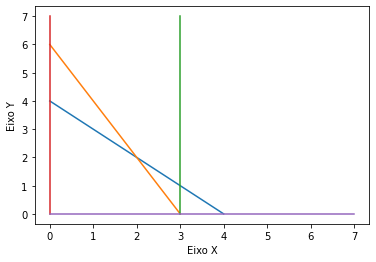

In [9]:
ppl.grafico(tam=7)

## Exemplo 2
### duas variáveis e duas restrições

maximizar 5x1 + 2x2

sujeito a: 

x1 - x2 >= 0

x1 <= 4

x1, x2 >= 0

**Forma padrão**

maximizar 5x1 + 2x2

sujeito a: 

x1 - x2 - x3= 0

x1 + x4 = 4

x1, x2, x3, x4 >= 0

In [10]:
# Informar os valores da matriz A
A = np.array([[1, -1, -1, 0],
              [1, 0, 0, 1]], dtype=object)

# Informar os valores da matriz b
b = np.array([[0], 
              [4]], dtype=object)

# Informar os valores do vetor c
c = np.array([5, 2, 0, 0], dtype=object)

## Informe 1 se você deseja maximizar ou 2 se você deseja minimizar
max_min = 1

ppl = forca_bruta(A, b, c, max_min)
ppl.print_atributes()

A: [[1 -1 -1 0]
 [1 0 0 1]] 

b: [[0]
 [4]] 

c: [5 2 0 0] 

1: maximizar || 2: minimizar: 
max_min: 1 



In [11]:
ppl.solve()


x 1
IB = 1 2
B = [[ 1 -1]
 [ 1  0]] 

B-1 = [[ 0.  1.]
 [-1.  1.]] 

xB = [[4.0]
 [4.0]] 

x = [4.0 4.0 0 0] 

cTx = 28.0 

Esta é uma solução básica viável

---------------------------------------------------------------------------


x 2
IB = 1 3
B = [[ 1 -1]
 [ 1  0]] 

B-1 = [[ 0.  1.]
 [-1.  1.]] 

xB = [[4.0]
 [4.0]] 

x = [4.0 0 4.0 0] 

cTx = 20.0 

Esta é uma solução básica viável

---------------------------------------------------------------------------


x 3
IB = 1 4
B = [[1 0]
 [1 1]] 

B-1 = [[ 1.  0.]
 [-1.  1.]] 

xB = [[0.0]
 [4.0]] 

x = [0.0 0 0 4.0] 

cTx = 0.0 

Esta é uma solução básica viável

---------------------------------------------------------------------------


x 4
IB = 2 3
B = [[-1 -1]
 [ 0  0]] 

A matriz B não é uma base

---------------------------------------------------------------------------


x 5
IB = 2 4
B = [[-1  0]
 [ 0  1]] 

B-1 = [[-1. -0.]
 [ 0.  1.]] 

xB = [[-0.0]
 [4.0]] 

x = [0 -0.0 0 4.0] 

cTx = 0.0 

Esta é uma solução básica vi

In [12]:
ppl.solucoes_p()

Todas as soluções:

Quantidade de soluções básicas:  5


,Conjunto de índices base,Id da solução,cTx,Solução básica associada à base
0,"[1, 2]",1,28.0,"[4.0, 4.0, 0, 0]"
1,"[1, 3]",2,20.0,"[4.0, 0, 4.0, 0]"
2,"[1, 4]",3,0.0,"[0.0, 0, 0, 4.0]"
3,"[2, 3]",4,[],[]
4,"[2, 4]",5,0.0,"[0, -0.0, 0, 4.0]"
5,"[3, 4]",6,0.0,"[0, 0, -0.0, 4.0]"


In [13]:
ppl.solucoes_viaveis_p()

Soluções viáveis:

Quantidade de soluções viáveis:  5


,Conjunto de índices base,Id da solução,cTx,Solução básica associada à base
0,"[1, 2]",1,28.0,"[4.0, 4.0, 0, 0]"
1,"[1, 3]",2,20.0,"[4.0, 0, 4.0, 0]"
2,"[1, 4]",3,0.0,"[0.0, 0, 0, 4.0]"
3,"[2, 4]",5,0.0,"[0, -0.0, 0, 4.0]"
4,"[3, 4]",6,0.0,"[0, 0, -0.0, 4.0]"


In [14]:
ppl.solucao_otima_p()

Solução Ótima: 28.0

Soluções que geram a solução ótima:



,Conjunto de índices base,Id da solução,cTx,Solução básica associada à base
0,"[1, 2]",1,28.0,"[4.0, 4.0, 0, 0]"


In [15]:
ppl.descricao_p()


O número máximo de soluções básicas: 6.0

Quantidade de soluções básicas:  5

Quantidade de soluções viáveis:  5

Solução Ótima: 28.0

Soluções que geram a solução ótima:



,Conjunto de índices base,Id da solução,cTx,Solução básica associada à base
0,"[1, 2]",1,28.0,"[4.0, 4.0, 0, 0]"


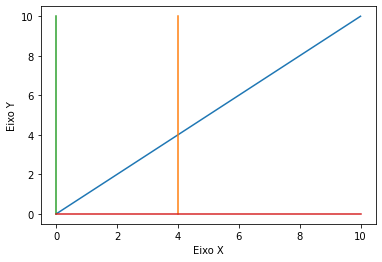

In [16]:
ppl.grafico(tam=10)

## Exemplo 3
##### Duas variáveis e duas restrições

maximizar x1 + 3x2

sujeito a: 

x1 - 2x2 >= - 6

2x1 + x2 <= 4

x1, x2 >= 0

**Forma Padrão:**

maximizar x1 + 3x2

sujeito a: 

x1 - 2x2 - x3 = - 6

2x1 + x2 + x4 = 4

x1, x2, x3, x4 >= 0

In [17]:
# Informar os valores da matriz A
A = np.array([[1, -2, -1, 0],
              [2, 1, 0, 1]], dtype=object)

# Informar os valores da matriz b
b = np.array([[-6], 
              [4]], dtype=object)

# Informar os valores do vetor c
c = np.array([1, 3, 0, 0], dtype=object)

## Informe 1 se você deseja maximizar ou 2 se você deseja minimizar
max_min = 1

ppl = forca_bruta(A, b, c, max_min)
ppl.print_atributes()

A: [[1 -2 -1 0]
 [2 1 0 1]] 

b: [[-6]
 [4]] 

c: [1 3 0 0] 

1: maximizar || 2: minimizar: 
max_min: 1 



In [18]:
ppl.solve()


x 1
IB = 1 2
B = [[ 1 -2]
 [ 2  1]] 

B-1 = [[ 0.2  0.4]
 [-0.4  0.2]] 

xB = [[0.3999999999999999]
 [3.2]] 

x = [0.3999999999999999 3.2 0 0] 

cTx = 10.000000000000002 

Esta é uma solução básica viável

---------------------------------------------------------------------------


x 2
IB = 1 3
B = [[ 1 -1]
 [ 2  0]] 

B-1 = [[ 0.   0.5]
 [-1.   0.5]] 

xB = [[2.0]
 [8.0]] 

x = [2.0 0 8.0 0] 

cTx = 2.0 

Esta é uma solução básica viável

---------------------------------------------------------------------------


x 3
IB = 1 4
B = [[1 0]
 [2 1]] 

B-1 = [[ 1.  0.]
 [-2.  1.]] 

xB = [[-6.0]
 [16.0]] 

x = [-6.0 0 0 16.0] 

cTx = -6.0 

Esta NÃO é uma solução básica viável

---------------------------------------------------------------------------


x 4
IB = 2 3
B = [[-2 -1]
 [ 1  0]] 

B-1 = [[-0.  1.]
 [-1. -2.]] 

xB = [[4.0]
 [-2.0]] 

x = [0 4.0 -2.0 0] 

cTx = 12.0 

Esta NÃO é uma solução básica viável

------------------------------------------------------------------------

/home/myllah/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


In [19]:
ppl.solucoes_p()

Todas as soluções:

Quantidade de soluções básicas:  6


,Conjunto de índices base,Id da solução,cTx,Solução básica associada à base
0,"[1, 2]",1,10.0,"[0.3999999999999999, 3.2, 0, 0]"
1,"[1, 3]",2,2.0,"[2.0, 0, 8.0, 0]"
2,"[1, 4]",3,-6.0,"[-6.0, 0, 0, 16.0]"
3,"[2, 3]",4,12.0,"[0, 4.0, -2.0, 0]"
4,"[2, 4]",5,9.0,"[0, 3.0, 0, 1.0]"
5,"[3, 4]",6,0.0,"[0, 0, 6.0, 4.0]"


In [20]:
ppl.solucoes_viaveis_p()

Soluções viáveis:

Quantidade de soluções viáveis:  4


,Conjunto de índices base,Id da solução,cTx,Solução básica associada à base
0,"[1, 2]",1,10.0,"[0.3999999999999999, 3.2, 0, 0]"
1,"[1, 3]",2,2.0,"[2.0, 0, 8.0, 0]"
2,"[2, 4]",5,9.0,"[0, 3.0, 0, 1.0]"
3,"[3, 4]",6,0.0,"[0, 0, 6.0, 4.0]"


In [21]:
ppl.solucao_otima_p()

Solução Ótima: 10.000000000000002

Soluções que geram a solução ótima:



,Conjunto de índices base,Id da solução,cTx,Solução básica associada à base
0,"[1, 2]",1,10.0,"[0.3999999999999999, 3.2, 0, 0]"


In [22]:
ppl.descricao_p()


O número máximo de soluções básicas: 6.0

Quantidade de soluções básicas:  6

Quantidade de soluções viáveis:  4

Solução Ótima: 10.000000000000002

Soluções que geram a solução ótima:



,Conjunto de índices base,Id da solução,cTx,Solução básica associada à base
0,"[1, 2]",1,10.0,"[0.3999999999999999, 3.2, 0, 0]"


/home/myllah/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


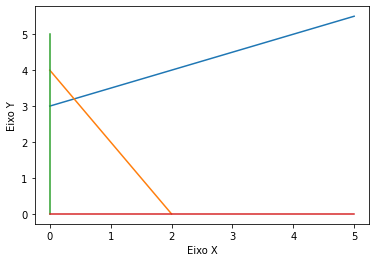

In [23]:
ppl.grafico(tam=5)